In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/Sriman Reddy/Downloads/titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


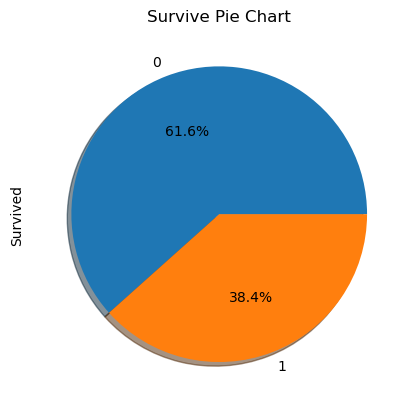

In [4]:
df.Survived.value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Survive Pie Chart')
plt.show()

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

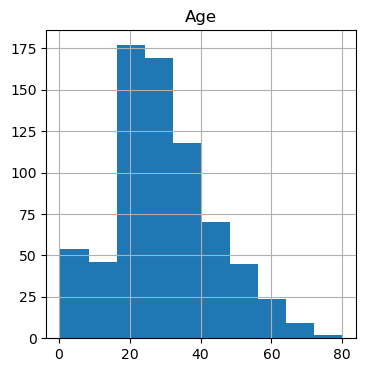

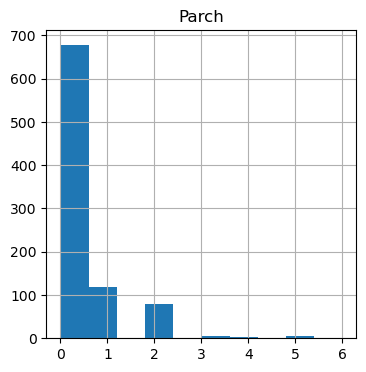

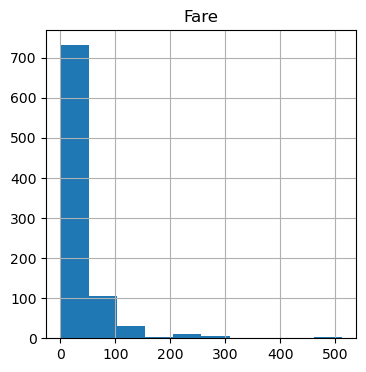

In [6]:
for col in ['Age', 'Parch', 'Fare']:
    fig, ax = plt.subplots(figsize=(4, 4))
    df[col].hist(ax=ax)
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

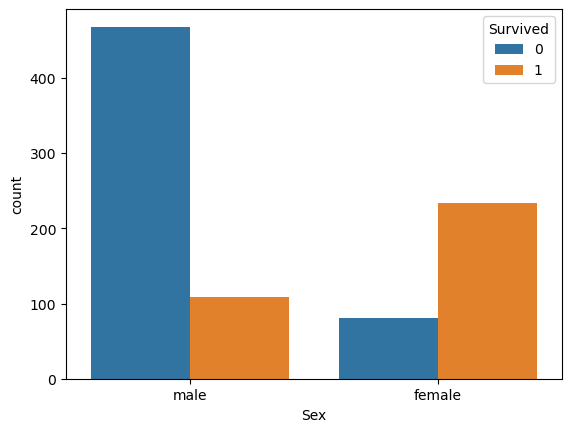

In [7]:
sns.countplot(data=df, x='Sex', hue='Survived')

<AxesSubplot:title={'center':'Male Survived Pie Chart'}, ylabel='Survived'>

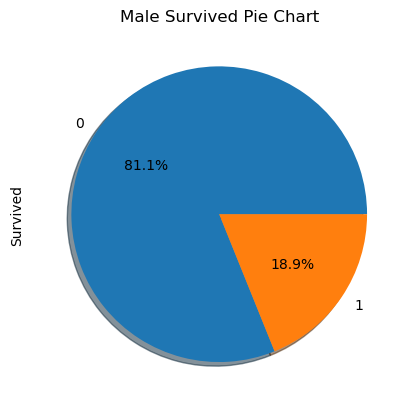

In [8]:
df[df.Sex == 'male'].Survived.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, title='Male Survived Pie Chart')

<AxesSubplot:title={'center':'Female Survived Pie Chart'}, ylabel='Survived'>

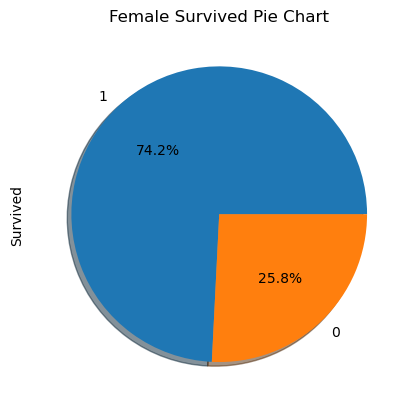

In [9]:
df[df.Sex == 'female'].Survived.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, title='Female Survived Pie Chart')

<AxesSubplot:>

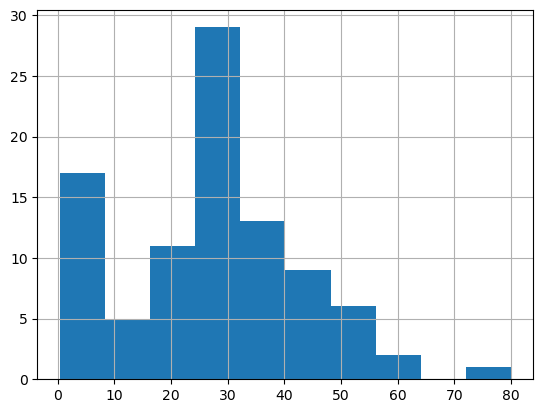

In [10]:
df[(df.Sex == 'male') & (df.Survived == 1)].Age.hist()

<AxesSubplot:>

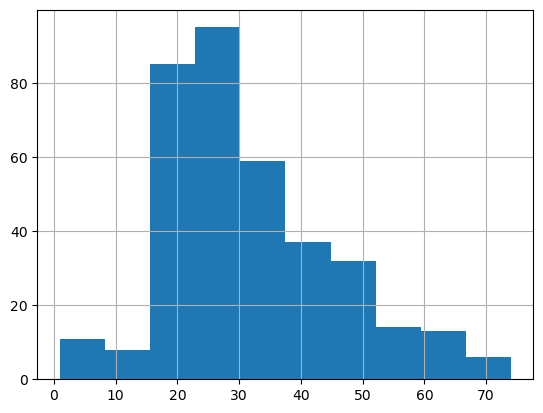

In [13]:
df[(df.Sex == 'male') & (df.Survived == 0)].Age.hist()

<AxesSubplot:>

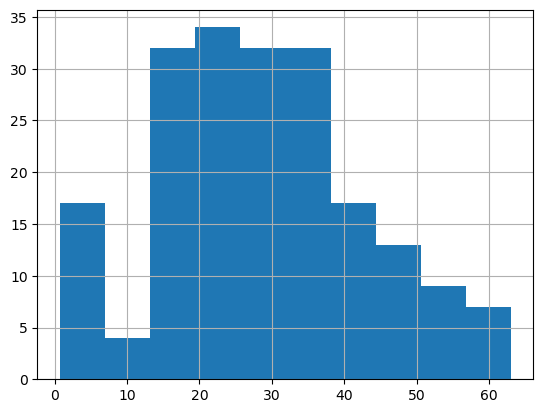

In [14]:
df[(df.Sex == 'female') & (df.Survived == 1)].Age.hist()

<AxesSubplot:>

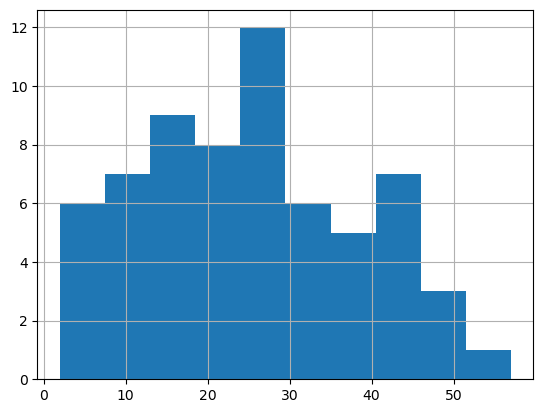

In [15]:
df[(df.Sex == 'female') & (df.Survived == 0)].Age.hist()

<AxesSubplot:ylabel='Pclass'>

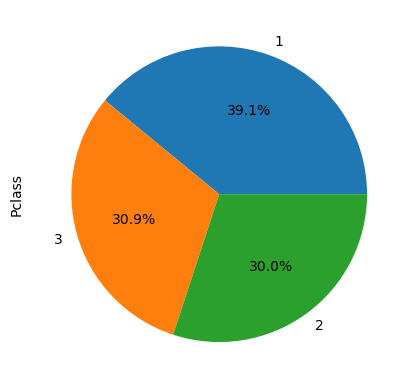

In [16]:
df[(df.Sex == 'female') & (df.Survived == 1)].Pclass.value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:ylabel='Pclass'>

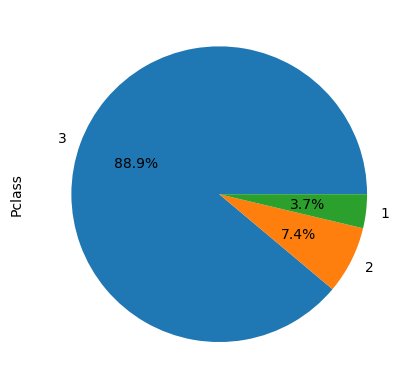

In [17]:
df[(df.Sex == 'female') & (df.Survived == 0)].Pclass.value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:xlabel='Sex', ylabel='count'>

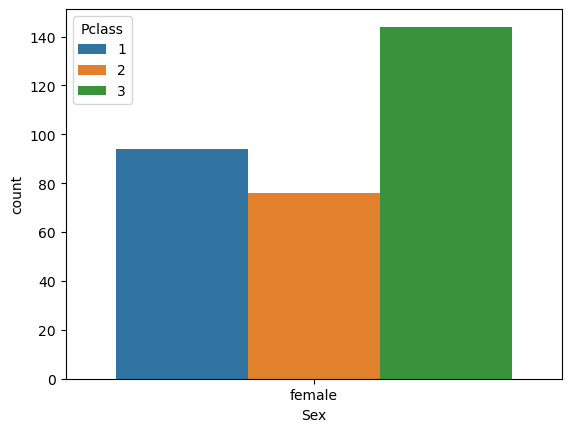

In [18]:
sns.countplot(data=df[df.Sex == 'female'], x='Sex', hue='Pclass')

<AxesSubplot:xlabel='Sex', ylabel='count'>

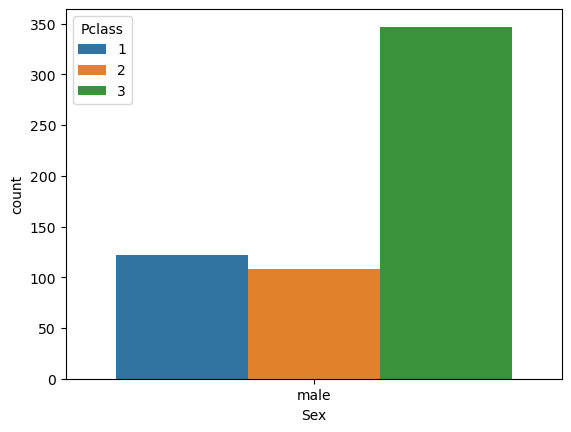

In [19]:
sns.countplot(data=df[df.Sex == 'male'], x='Sex', hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

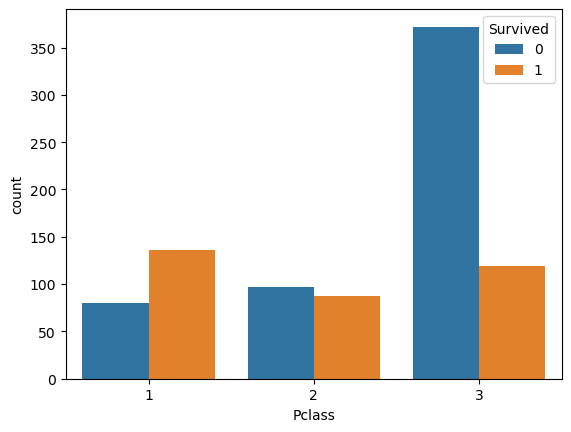

In [20]:
sns.countplot(data=df, x='Pclass', hue='Survived')

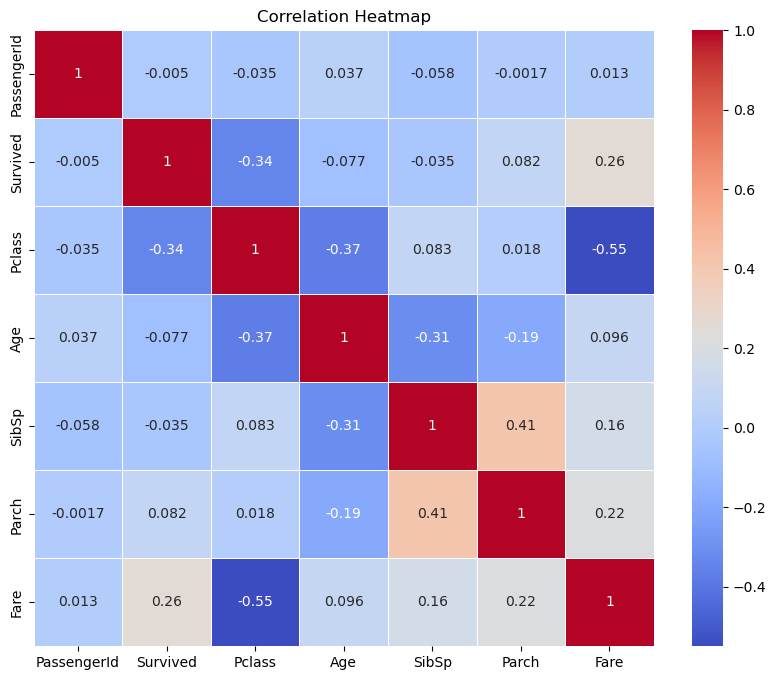

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for all columns in the DataFrame
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

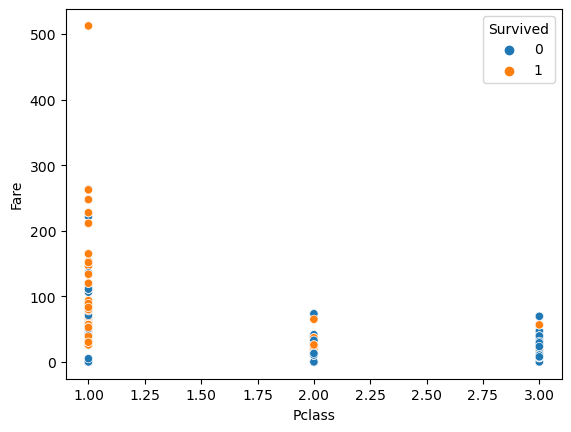

In [26]:
sns.scatterplot(data=df, x='Pclass', y='Fare', hue='Survived')

<AxesSubplot:ylabel='Frequency'>

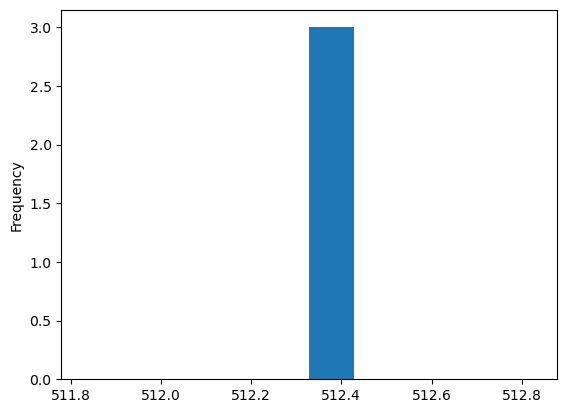

In [27]:
df[df.Fare > 300].Fare.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

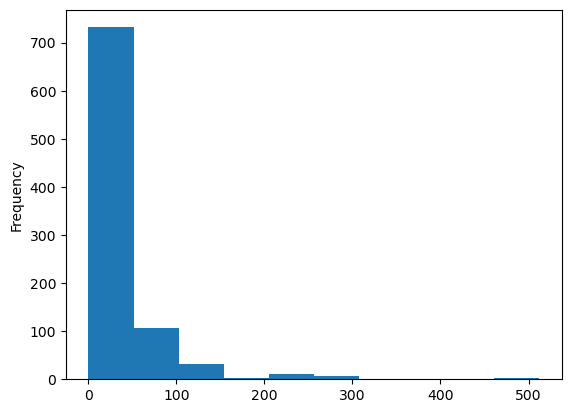

In [28]:
df.Fare.plot(kind='hist')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

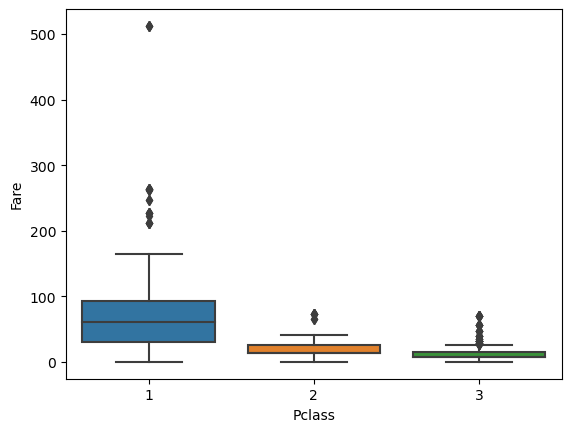

In [29]:
sns.boxplot(data=df, x='Pclass', y='Fare')

<AxesSubplot:>

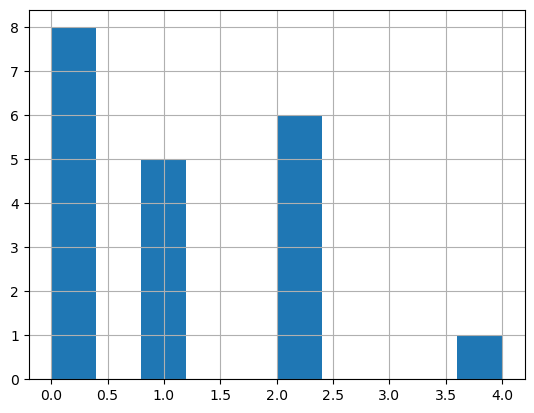

In [30]:
df[(df.Fare > 200) & (df.Pclass == 1)].Parch.hist()

<AxesSubplot:>

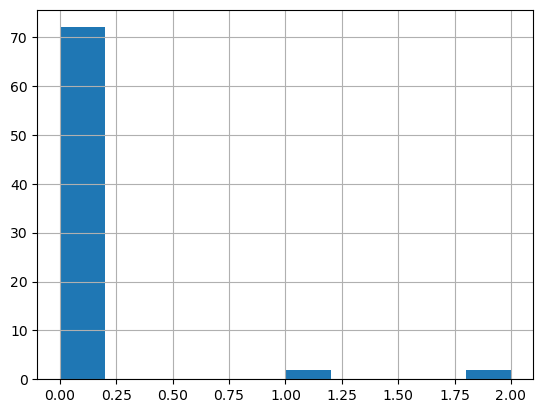

In [31]:
df[(df.Fare < 50) & (df.Pclass == 1)].Parch.hist()

<AxesSubplot:>

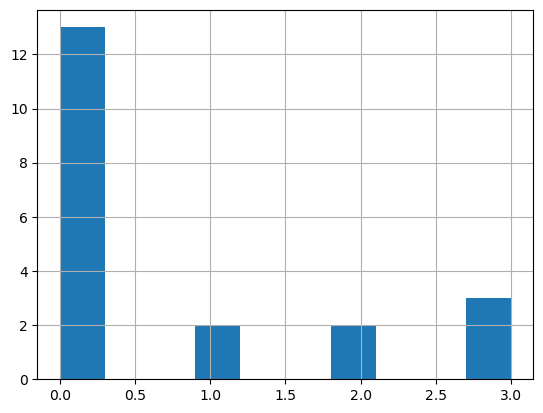

In [32]:
df[(df.Fare > 200) & (df.Pclass == 1)].SibSp.hist()

<AxesSubplot:>

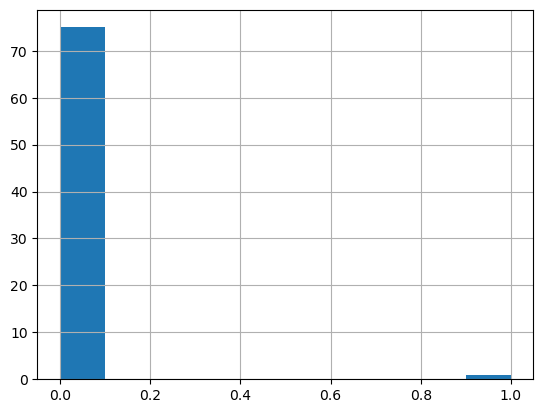

In [33]:
df[(df.Fare < 50) & (df.Pclass == 1)].SibSp.hist()

In [34]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

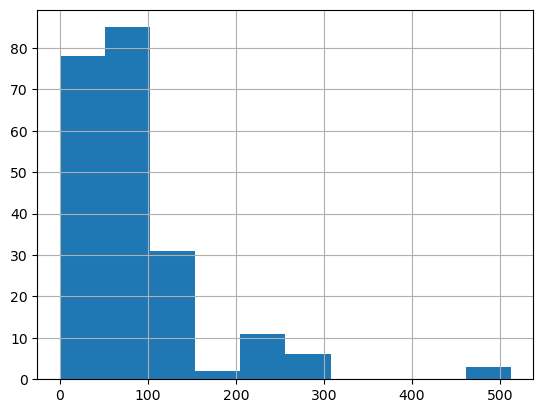

In [35]:
df[df.Pclass == 1].Fare.hist()

<AxesSubplot:>

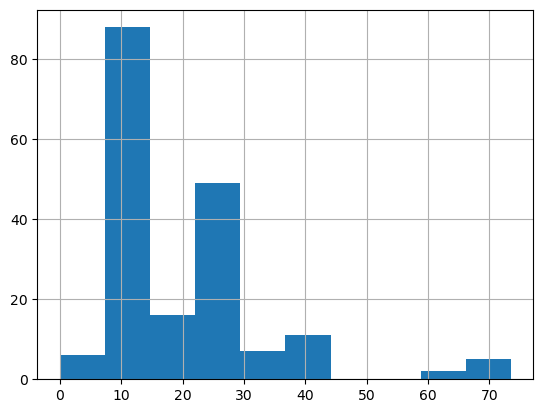

In [36]:
df[df.Pclass == 2].Fare.hist()

<AxesSubplot:>

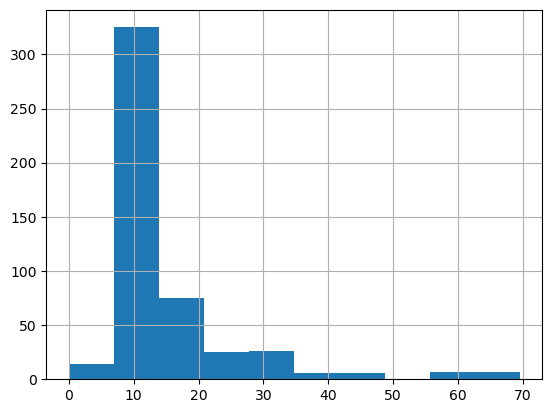

In [37]:
df[df.Pclass == 3].Fare.hist()

In [38]:
df[df.Pclass == 1].Fare.median()

60.287499999999994

In [39]:
df[df.Pclass == 2].Fare.median()

14.25

In [68]:
df[df.Pclass == 3].Fare.median()

8.05

<AxesSubplot:xlabel='Fare', ylabel='count'>

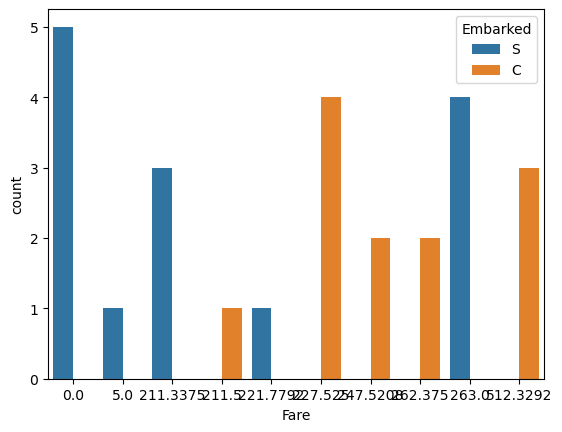

In [69]:
sns.countplot(data=df[(df.Pclass == 1) & ((df.Fare < 25) | (df.Fare > 200))], x='Fare', hue='Embarked')

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

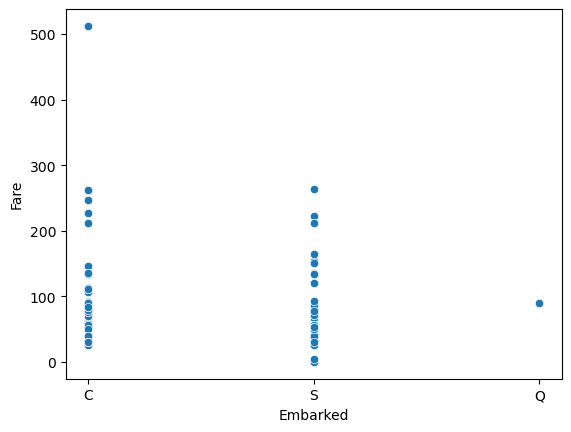

In [70]:
sns.scatterplot(data=df[df.Pclass == 1], x='Embarked', y='Fare')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

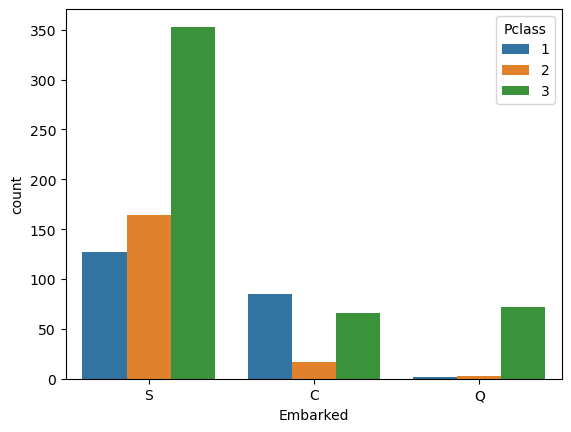

In [71]:
sns.countplot(data=df, x='Embarked', hue='Pclass')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

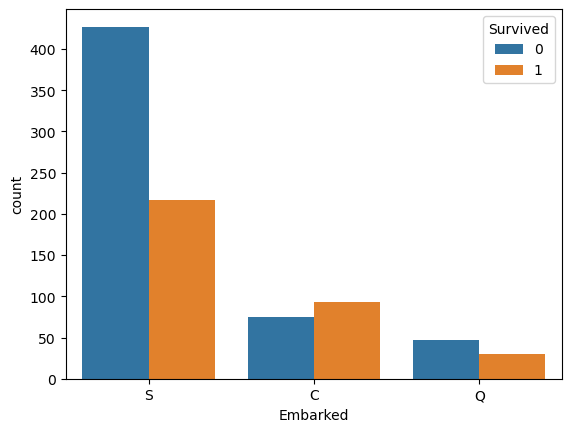

In [72]:
sns.countplot(data=df, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

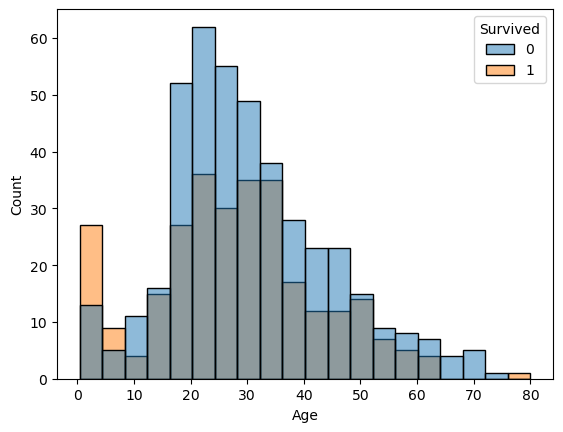

In [73]:
sns.histplot(data=df, x='Age', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

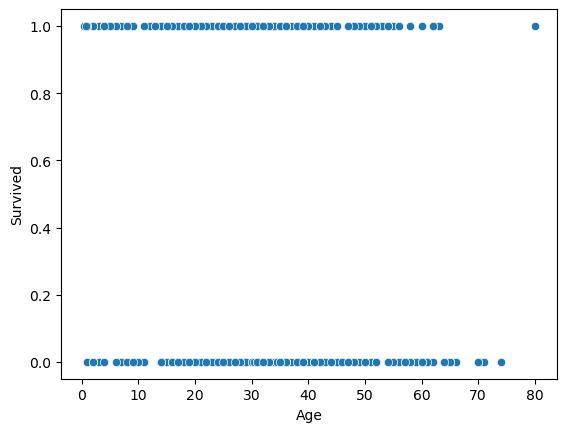

In [74]:
sns.scatterplot(data=df, x='Age', y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Count'>

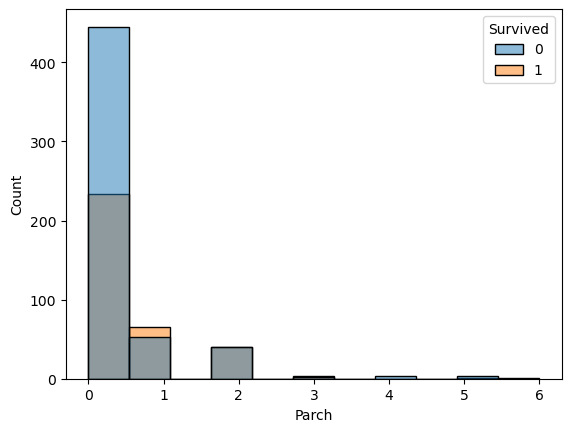

In [75]:
sns.histplot(data=df, x='Parch', hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

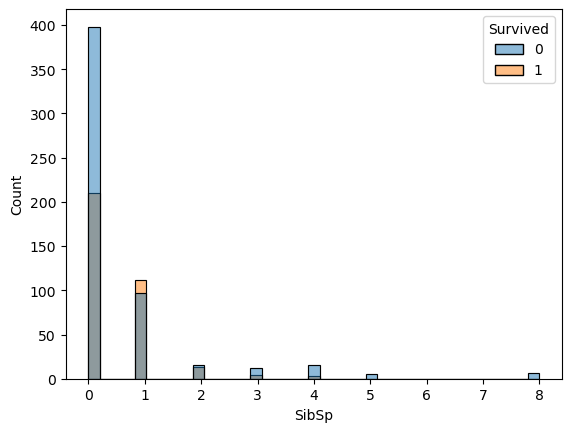

In [76]:
sns.histplot(data=df, x='SibSp', hue='Survived')

In [77]:
df = df[['Survived', 'Pclass', 'Sex', 'Fare']]
df.head()

,Survived,Pclass,Sex,Fare
0,0,3,male,7.2500
1,1,1,female,71.2833
2,1,3,female,7.9250
3,1,1,female,53.1000
4,0,3,male,8.0500


In [78]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Fare        0
dtype: int64

In [79]:
df = pd.get_dummies(df)
df

,Survived,Pclass,Fare,Sex_female,Sex_male
0,0,3,7.2500,0,1
1,1,1,71.2833,1,0
2,1,3,7.9250,1,0
3,1,1,53.1000,1,0
4,0,3,8.0500,0,1
...,...,...,...,...,...
886,0,2,13.0000,0,1
887,1,1,30.0000,1,0
888,0,3,23.4500,1,0
889,1,1,30.0000,0,1


In [80]:
X = df.drop('Survived', axis=1)
y = df.Survived

In [81]:
scaler = StandardScaler()

In [82]:
X = scaler.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [84]:
models = {}

In [85]:
cls = RandomForestClassifier()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
models['Random Forest'] = acc

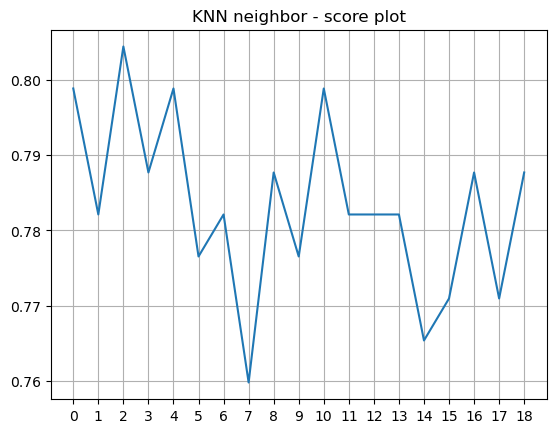

In [86]:
score_list = []
for i in range(1, 20):
    cls = KNeighborsClassifier(n_neighbors=i)
    cls.fit(X_train, y_train)
    score_list.append(cls.score(X_test, y_test))
plt.plot(score_list)
plt.title('KNN neighbor - score plot')
plt.xticks(range(len(score_list)))
plt.grid()
plt.show()

In [87]:
cls = KNeighborsClassifier(n_neighbors=2)
cls.fit(X_train, y_train)
models['KNN'] = cls.score(X_test, y_test)

In [88]:
cls = LogisticRegression()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
models['LogisticRegression'] = acc

In [89]:
cls = DecisionTreeClassifier(random_state=0)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
models['DecisionTreeClassifier'] = acc

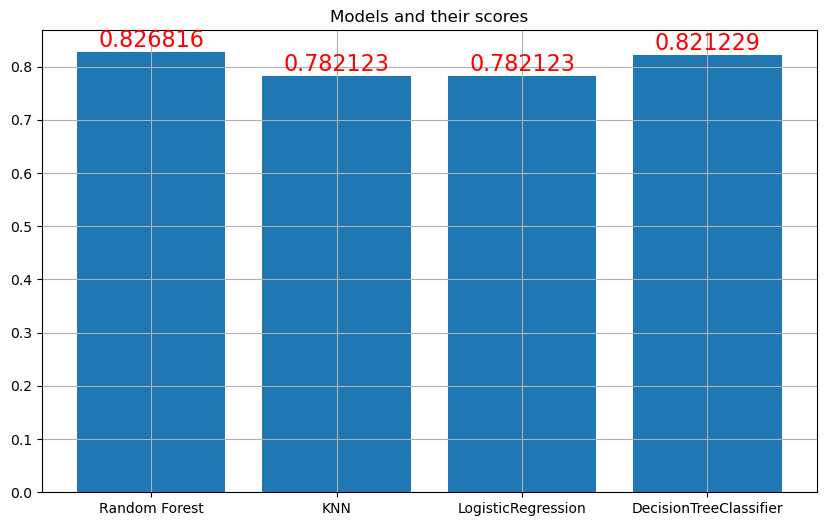

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
bar = ax.bar(range(len(models)), list(models.values()), align='center')
plt.xticks(range(len(models)), list(models.keys()))
plt.title('Models and their scores')
plt.grid()
ax.bar_label(bar, color='red', size='16')
plt.show()